# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
print(city_data_df.shape)
print(ride_data_df.shape)



(120, 3)
(2375, 4)


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_city = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type.
average_fare_per_ride = total_fares / total_rides_by_city
average_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides' : total_rides_by_city, 
                     'Total Drivers' : total_drivers, 
                     'Total Fares' : total_fares,
                     'Avg Fare per Ride' : average_fare_per_ride, 
                     'Avg Fare per Driver': average_fare_per_driver})

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [10]:
#  8. Format the columns.
#Format the "Total Fares," "Avg Fare per Ride," and "Avg Fare per Driver" columns to have $ and ,
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Avg Fare per Ride'] = pyber_summary_df['Avg Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Avg Fare per Driver'] = pyber_summary_df['Avg Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.describe()


,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the incices are the city type and date.
weekly_fares_df = pyber_data_df.groupby(['type', 'date']).sum('fare')
weekly_fares_df.head()


fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the other 'pivot()' function.
weekly_fares_df = weekly_fares_df.reset_index()
weekly_fares_df.head()


,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns = 'type'. and values = 'fare' 
sum_fare_by_type_pivot = weekly_fares_df.pivot(index="date", columns="type", values="fare")
sum_fare_by_type_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Creaete a new DataFrame from the pivot table DataFrame using loc on the given dates: '2019-01-01':'2019-04-29'.
sum_fare_df = sum_fare_by_type_pivot
sum_fare_df

#Set date range for DataFrame
fares_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April.tail(20)


type,Rural,Suburban,Urban
date,,,
2019-04-27 06:20:30,NaN,28.29,NaN
2019-04-27 07:18:32,NaN,18.56,NaN
2019-04-27 07:34:33,NaN,30.28,NaN
2019-04-27 08:48:36,NaN,NaN,12.84
2019-04-27 10:17:26,NaN,20.41,NaN
2019-04-27 10:55:00,NaN,NaN,11.42
2019-04-27 11:18:02,NaN,NaN,27.89
2019-04-27 11:59:25,NaN,NaN,30.31
2019-04-27 12:31:49,NaN,NaN,41.48


In [16]:
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April.index


DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)

In [17]:
# 6. Set the 'date' index to datetime datatype. This is necessary to use the resample() method in step 8.
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [19]:
# 8. Create a new DataFrame using the 'resample()' function by week 'W' and get the sum of the fares for each week.
sum_fare_df = fares_Jan_April.resample('W').sum()
sum_fare_df.tail(10)


type,Rural,Suburban,Urban
date,,,
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93
2019-03-17,163.39,906.20,2044.42
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80


<function matplotlib.pyplot.show(close=None, block=None)>

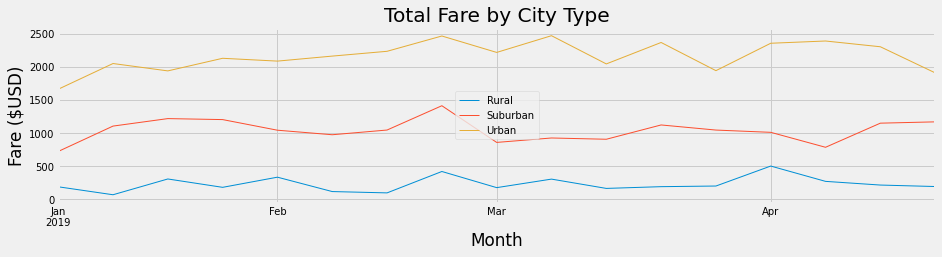

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_chart = sum_fare_df.plot(figsize=(14,3), title='Total Fare by City Type', lw=1, fontsize=10, kind='line')

fare_chart.set_xlabel("Month")
fare_chart.set_ylabel('Fare ($USD)')
fare_chart.legend(loc='center', fontsize=10)

plt.show
